## Environment

### Jupyter notebook

 - Web-based environment for interactive development of code.
 - Can interleave cells containing rich format comments (in **markdown**) and code (in our case, **Python 3**).
 - Best suited for **prototyping** and **demoing**.
 - When the cell is not in write mode use `A` and `B` to add a new cell before and after the current one, respectively.
 - Run the code in a cell with `Shift+Enter`.
 - Be careful of the side-effects of running cells **out of order**!
 

### Setup
- The necessary packages need to be installed from a terminal (In Jupyter, instructions starting with `!`). 
- Some environments, such as `Conda`, come up with a set of pre-installed packages, which include the most.
- The packages have then to be imported with the `import` instruction to make the functions and classes available for use.
- To import specific functions from a package: `from {package} import {function}`.
- To give an alias to the package: `import {package} as {alias}`.

In [1]:
%%capture
# Installation of the required packages (in case they are not present in your environment)
!pip install numpy
!pip install matplotlib

In [2]:
# Importing the needed packages
%matplotlib inline
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import imageio

## Browsing through local folders

There are two ways to access a particular file on your folders.
- *Relative* to the position of this notebook
- *Absolute* from the root of your operating system

In the following example, we read the same file through this different methods.

In [3]:
# Relative path
# This implies browsing two folders back from the one where this notebook is located
filename = "./../../data/example_geotiff_1band.tif"

# Absolute path
# It requires resolving your project path first, then appending folders to it
project_path = pathlib.Path.cwd().parents[2]
filename = f"{project_path.joinpath('data/example_geotiff_1band.tif')}"

## Basic operations on images

### Reading from a file

To recover the placement of the image, it is necessary to resolve its absolute path in your project organization. 
In the following example, we open a grayscale image and we save it over a bidimensional array `img_barbara
`. This is a **numpy array**, a multidimentional and homogeneous array whose entries represent the intensity of the image at each pixel.

**Image formats:** Most image processing utilities work with `float` types, for which the intensities are floating point values in the interval $[0, 1]$. When the image is loaded, however, the intensities are typically represented as an 8-bit unsigned, spanning the interval $[0, 255]$. For the purpose of processing, it is typically necessary to switch between these two representations (typically `float` when processing and `uint8` when displaying/returning outputs).

In [4]:
imagefile = "./../../data/example_geotiff_1band.tif"
img = imageio.v2.imread(imagefile)
print(f"Type of the loaded image: {type(img)}")
print(f"Data type of the pixel intensities (entries of the array): {img.dtype}")
print(f"Range of the pixel intensities: [{np.min(img)}, {np.max(img)}]")

img_barbara = img.astype(float)/255
print(f"Data type of the pixel intensities (entries of the array): {img.dtype}")
print(f"New range of the pixel intensities: [{np.min(img)}, {np.max(img)}]")

Type of the loaded image: <class 'imageio.core.util.Array'>
Data type of the pixel intensities (entries of the array): float32
Range of the pixel intensities: [184.88702392578125, 3995.078369140625]
Data type of the pixel intensities (entries of the array): float32
New range of the pixel intensities: [184.88702392578125, 3995.078369140625]


### Displaying an image

The `mathplotlib` package provides: 
- the `figure()` function to set the canvas (the key `figsize` can adjust the size of your canvas)
    - `subplots()` can be used to draw more figures on the same canvas
- the `imshow()` function to plot an image (the `cmap` key defines the colormap to employ for monochromatic images)
- the `show()` function to display all the figures that were produced (typically called at the end of your routine).

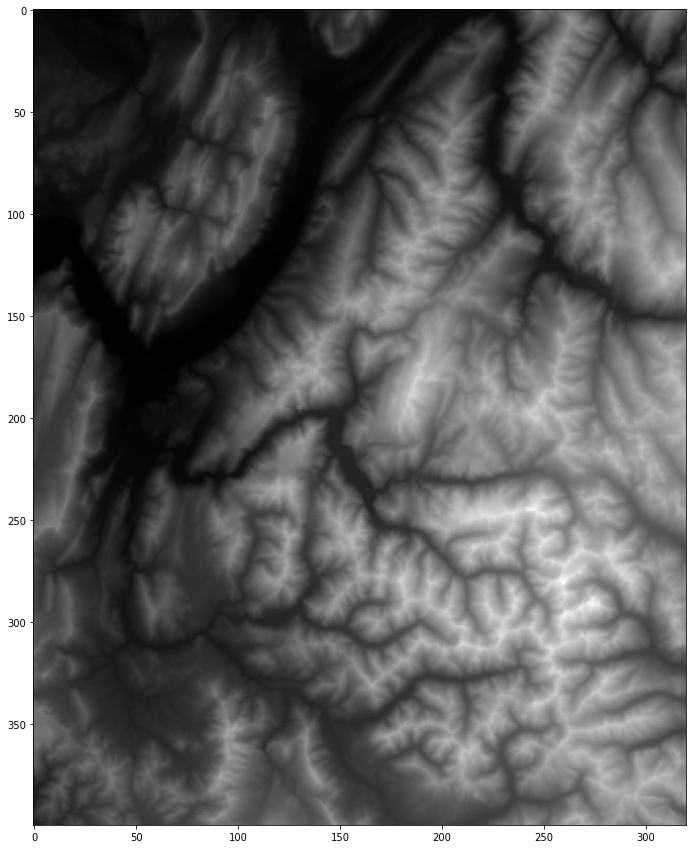

In [5]:
plt.figure(figsize=(15, 15)) 
plt.imshow(img_barbara, cmap='gray')
plt.show()

### Slicing
Let us consider for simplicity a generic monodimensional numpy array `arr` of length `N`:
- An element of the array is accessed through square brackets `arr[index]`
- The indexes `index` go from `0` to `N-1`. 
- The array can be accessef from the end using negative indices, going from `-1` to `-N`

the slicing operation is performed with any of the following operations:
- `arr[start:stop]`
- `arr[start:stop:step]`

where:

- `start` is the starting index (if not specified, it defaults to `0`, the first index of an array).
- `stop` is the ending index (if not specified, it defaults to `N`). 
    - Note: the ending index itself is not included in the final sliced array
- `step` is the step size, allowing to take every `step`-th sample (if not specified, it defaults to `1`)

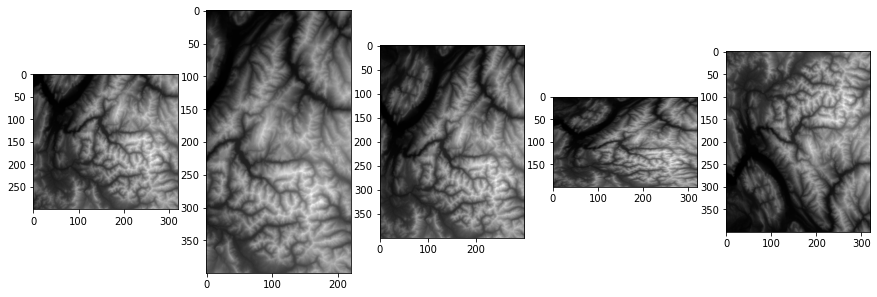

In [6]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,15))
ax1.imshow(img[100:400,:], cmap="gray")  # Horizontal slice
ax2.imshow(img[:, 100:400], cmap="gray")  # Vertical slice (starting from zero)
ax3.imshow(img[:, -300:], cmap="gray")  # Negative indices denote positions starting from the opposite end
ax4.imshow(img[::2, :], cmap="gray")  #  Takes a row every 2 (result: all the even indexed rows)
ax5.imshow(img[::-1, :], cmap="gray")  # Flipping an image on the horizontal side
plt.show()

### Mathematical operations

Let: 
- `a` be a scalar
- `img1` and `img2` be bidimensional numpy array with the same dimensions $N_1 \times N_2$ (e.g. representing two images)
- `arr` be a monodimensional array of dimension $N_1$

Some basic operations that can be performed:
- Mathematical operations (`+`, `-`, `*`, `\`, `**`, etc.) on numpy arrays are considered elementwise:
    - `img1 + img2` returns an array whose element are the sum of the corresponding elements of each array
- Operation with scalars are broadcasted over all the elements:
    - `a * img1` returns a $N_1 \times N_2$ array where all the elements of `img1` have been multiplied by `a`
- Any operation can be broadcasted as long as the dimensions of the operants are coherent:
    - `img1 / arr[:, np.newaxis]` is equivalent to apply an elementwise division by `arr` on each row of `img1`
    - `np.newaxis` is needed to add a new axis to `arr` of size 1, so that both arrays are bidimensional

Sizes of the image: (400, 320)
Size of the filter: (400,)
Size of the filter to broadcast: (400, 1)


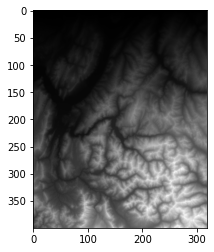

In [7]:
# Example: Applying a linear shading along a direction

(nb_rows, nb_cols) = img.shape
shade_filter_h = np.linspace(0, 1, nb_rows) # Creates a gradient array (An array increasing linearly from 0 to 1)
shade_filter_v = np.linspace(0, 1, nb_cols)

print(f"Sizes of the image: {img.shape}")
print(f"Size of the filter: {shade_filter_h.shape}")
print(f"Size of the filter to broadcast: {shade_filter_h[:, np.newaxis].shape}")

img_shaded_v = img * shade_filter_h[:, np.newaxis] # Vertical shading (Note: an axis is added to the end)
img_shaded_h = img * shade_filter_v[np.newaxis, :] # Horizontal shading

plt.imshow(img_shaded_v, cmap="gray")
plt.show()